<a href="https://colab.research.google.com/github/szalai1/misc/blob/master/coursera-ai-tensorflow/Exercise4_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [5]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"


zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()
train_happy_dir = "/tmp/h-or-s/happy"
train_sad_dir = "/tmp/h-or-s/sad"
class myCallback(tf.keras.callbacks.Callback):# Your Code):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc') > 0.999:
      self.model.stop_training = True

callbacks = myCallback()

--2019-04-01 11:37:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-04-01 11:37:07 (137 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



['happy2-13.png', 'happy2-12.png', 'happy1-11.png', 'happy1-18.png', 'happy1-14.png', 'happy2-10.png', 'happy1-00.png', 'happy2-16.png', 'happy1-12.png', 'happy1-19.png']
['sad2-07.png', 'sad1-19.png', 'sad1-05.png', 'sad2-00.png', 'sad1-02.png', 'sad1-09.png', 'sad2-08.png', 'sad1-18.png', 'sad2-14.png', 'sad1-13.png']


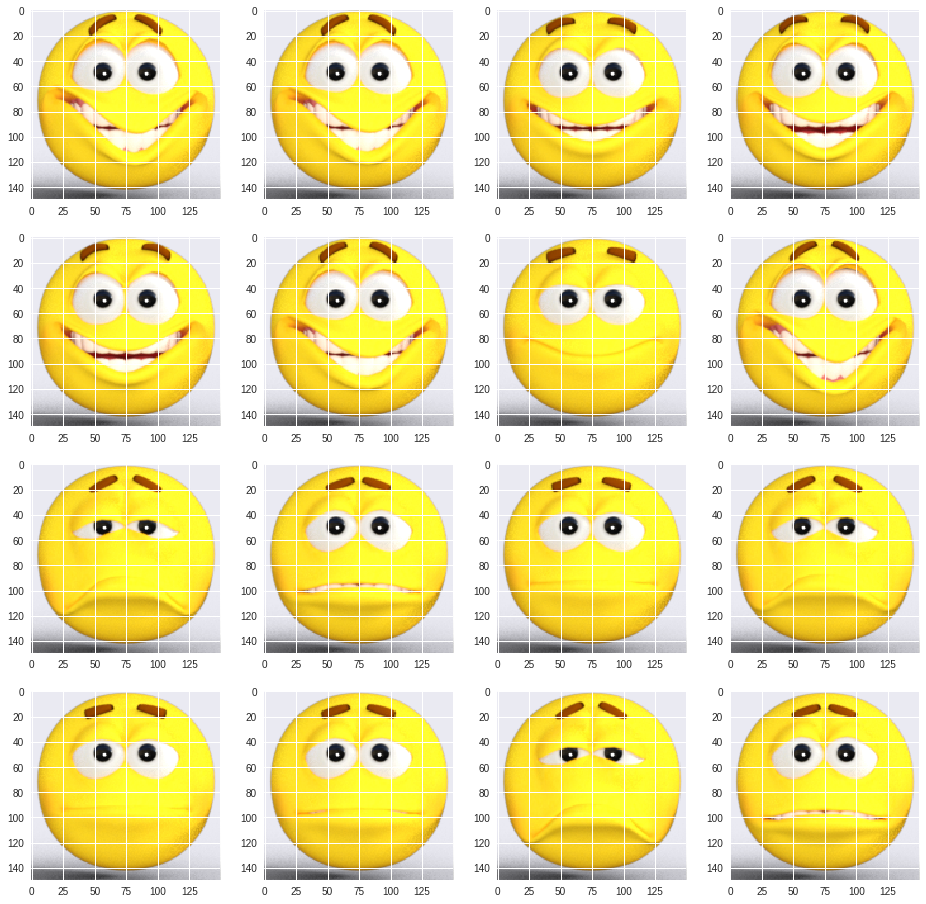

In [7]:
# plot
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])


next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  #sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
# Your Code Here
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', 
             optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory('/tmp/h-or-s',
                                                    class_mode='binary',
                                                   target_size=(150,150))
        # Your Code Here)

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [12]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
    train_generator, epochs=15,
    callbacks=[callbacks])
      # Your Code Here)
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/15
3/3 [==============================] - 3s 870ms/step - loss: 0.0051 - acc: 1.0000
